<center>
    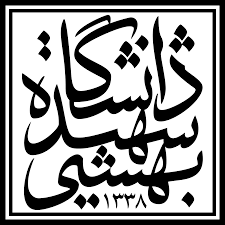
</center>

# Semantic Similarity Analysis (SSA) | Unsupervised Semantic Analysis

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:


*   Embedd Texual Data into numerical vectors using `gensim` library
*   Perform operations with word vectors such as similarity checking

    


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-thttps://https://op/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01: 20px">
    <ul>
        <li>
        <li>
            <a>Data Cleaning</a>
            <ul>
                <li><a>Loading Data</a></li>
                <li><a>Tokenizing</a></li>
                <li><a>Removing Stopwords</a></li>
            </ul>
        </li>
        <li>
            <a>Generating Word Vectors</a>
            <ul>
                <li><a>Word2Vec</a></li>
                <li><a>Training</a></li>
                <li><a>Similarity Checking</a></li>
            </ul>
        </li>
        <li><a>Visualizing</a></li>
    </ul>

</div>

<hr>


In [1]:
import plotly.express as px
import matplotlib.pyplot as plt 

import pandas as pd 
import numpy as np 

from gensim.models import Word2Vec 

In [2]:
train = pd.read_csv('comments/train.csv')
test = pd.read_csv('comments/test.csv')

stopwords = pd.read_table('persianST.txt')

In [3]:
import nltk
from nltk.stem import 	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#train.text.apply(lambda x: wordnet_lemmatizer.lemmatize(x))

In [4]:
import nltk

words = train["comment"].apply(nltk.word_tokenize)


In [5]:
train

,comment,date
0,مثل همیشه عالی مخصوصا برگر ایتالیایی,2021-10-10 16:15:06
1,اقا شاید من هیچ قاشق و چنگالی نداشته باشم! بای...,2021-04-23 18:01:53
2,خیلی خوشمزه بود ای کاش تنوع بیشتری بدین حلوا ر...,2021-05-31 04:18:20
3,خوب بود فقط نسبت به مبلغ مرغ بریان اندازه اون ...,2021-04-04 12:56:17
4,به موقع و خوب فقط پیک اجناس را تا درب واحد بال...,2021-04-09 14:35:00
...,...,...
55995,حجم سالاد بسیار کم بود حجم محتوای ساندویچ هم ه...,2021-04-02 15:16:20
55996,سفارش من چلو کوبیده بود و اصلا راضی نبودم، گوش...,2021-09-04 02:01:01
55997,کیف غذا بسیار پایین بود … هیچوقت دیگه نخواهم س...,2021-02-03 14:34:38
55998,بیسکوییت مادر ساده به جای نارگیلیش فرستادید,2021-06-24 14:12:43


In [8]:
model = Word2Vec(min_count=3, vector_size=100)
model.build_vocab(words)
model.train(words, total_examples=model.corpus_count, epochs=model.epochs*100)

corpus = list(model.wv.key_to_index.keys())
word_vectors = model.wv[corpus]


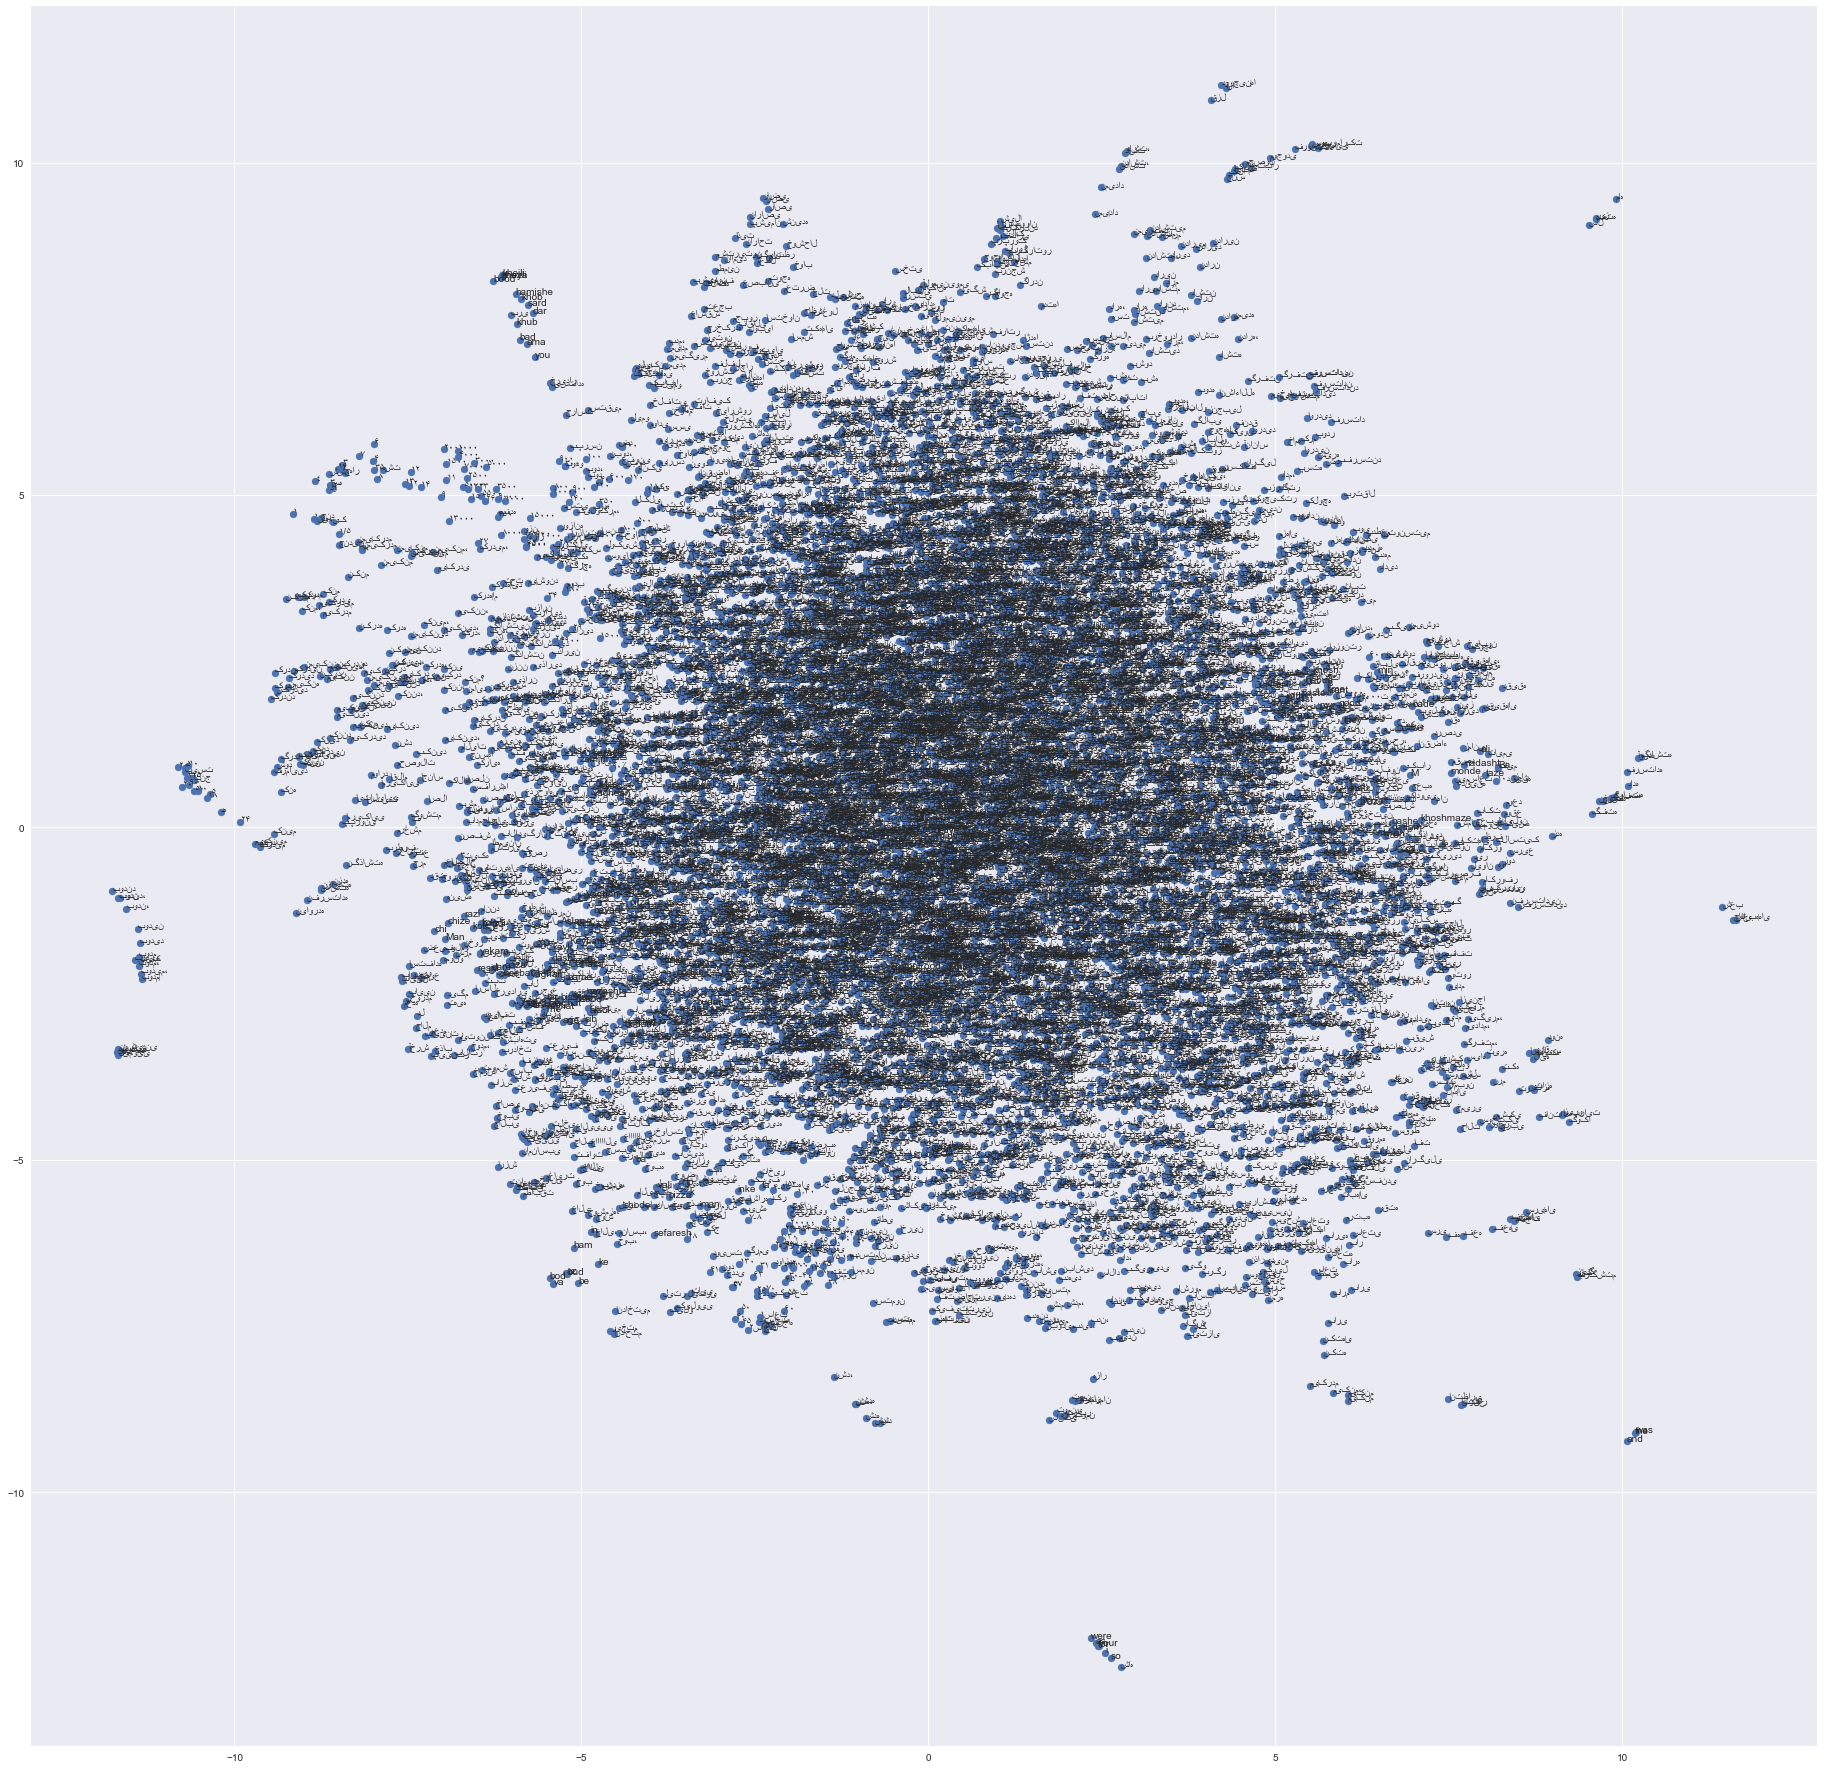

In [9]:
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=30)
word_vectors_pca = pca.fit_transform(word_vectors)

result = umap.UMAP(
    n_neighbors=3,
    min_dist=0.8,
    n_components=2,
    random_state=1,
).fit_transform(word_vectors_pca)

plt.style.use('seaborn')
plt.figure(figsize=(32, 32))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(corpus):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))

# plt.xlim([1.5, 2.7])
# plt.ylim([-6, -5])

In [ ]:
X = []
for i in words: 
    sent = []
    for j in i: 
        if model.wv.has_index_for(j):
            sent.append(model.wv[j])
    X.append(sent)

# TESTINGS